# Felix Nicholas

## Task 2 - Finding the Optimum Number of Clusters

## Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Loading the Data

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping the Id column
df.drop(['Id'], axis = 1, inplace =True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
#Checking if there is any missing values in the dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### The Elbow Method can be used to determine the optimum number of clusters for K-Means Clustering

In [6]:
x = df.iloc[:,0:4].values

wcss = [] #Empty list for the values of within-cluster sum of squares

for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=17)
    model.fit(x)
    wcss_unit = model.inertia_
    wcss.append(wcss_unit)

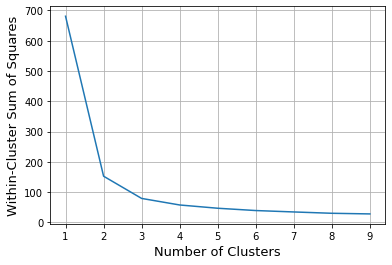

In [7]:
#Visualizing the elbow method
number_of_clusters = range(1,10)
plt.plot(number_of_clusters, wcss)
plt.xlabel('Number of Clusters', fontsize = 13)
plt.ylabel('Within-Cluster Sum of Squares', fontsize = 13)
plt.grid() #Adding grid to improve visibility
plt.show()

The elbow acts as a cutoff point, where adding another cluster doesn't further improve the modelling of our data. From the graph above, we can see that the elbow occurs at <b> n = 3 <b/>

In [8]:
#Creating the KMeans clustering model
model = KMeans(n_clusters = 3, random_state = 17)
model.fit(x)

clusters = model.fit_predict(x)

## Visualization

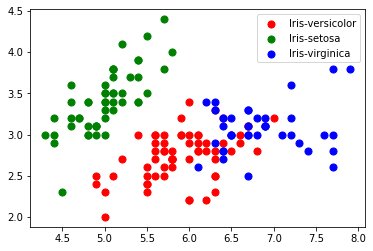

In [9]:
#Visualizing the result based on the size of sepals
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 50,
            c = 'red', label = 'Iris-versicolor')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 50,
            c = 'green', label = 'Iris-setosa')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 50,
            c = 'blue', label = 'Iris-virginica')
plt.legend()
plt.show()

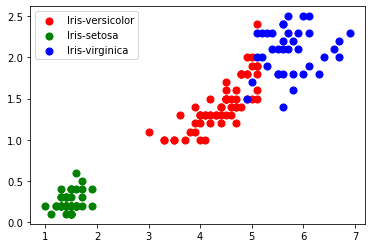

In [10]:
#Visualizing the result based on the size of petals
plt.scatter(x[clusters == 0, 2], x[clusters == 0, 3], s = 50,
            c = 'red', label = 'Iris-versicolor')
plt.scatter(x[clusters == 1, 2], x[clusters == 1, 3], s = 50,
            c = 'green', label = 'Iris-setosa')
plt.scatter(x[clusters == 2, 2], x[clusters == 2, 3], s = 50,
            c = 'blue', label = 'Iris-virginica')
plt.legend()
plt.show()